<a href="https://colab.research.google.com/github/brmandw/bike/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: BIKE SHARING DATASET
- **Nama:** Amanda Nur Rahmi
- **Email:** amndof@gmail.com
- **ID Dicoding:** brmandw

## Menentukan Pertanyaan Bisnis

- Kapan cuaca yang paling banyak meraih pengguna kasual dan registered?
- Di setiap weather jam berapa yang paling banyak meraih pengguna?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


## Data Wrangling

### Gathering Data

In [ ]:
hour_df = pd.read_csv('/content/hour.csv')
day_df = pd.read_csv('/content/day.csv')


**Insight:**
Dataset ini berisi jumlah penyewaan sepeda dalam bentuk harian dan jam. Di dalamnya terdapat 17 kolom (16 untuk day karena tanpa kolom hour) yang terdiri dari
- instant -> index
- dteday -> tanggal (YYYY-MM-DD)
- season -> 1, 2, 3, 4
- yr -> 0: 2011, 1: 2012
- mnth -> 1-12
- hr (hanya di hour) -> 0-23     
- holiday -> 0: True (holiday bukan weekend), 1: False
- weekday -> 0-6; minggu-sabtu
- workingday -> 0: weekend, 1: weekday (working day)
- weathersit -> 1-4
- temp -> temperatur (celsius)
- atemp -> temperatur terasa seperti (celcius)
- hum -> kelembapan
- windspeed -> kecepatan angin
- casual -> jumlah pengguna kasual (not registered)
- registered -> jumlah pengguna registered (terdaftar)
- cnt -> jumlah pengguna casual dan registered  

### Assessing Data

In [ ]:
hour_df.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,weather_cut,season_cut,year_cut,month_cut,hr_cut
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0000,3,13,16,"Cerah, Sedikit Berawan, Sebagian Berawan",Musim Semi,2011,Januari,00:00
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0000,8,32,40,"Cerah, Sedikit Berawan, Sebagian Berawan",Musim Semi,2011,Januari,01.00
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0000,5,27,32,"Cerah, Sedikit Berawan, Sebagian Berawan",Musim Semi,2011,Januari,02:00
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0000,3,10,13,"Cerah, Sedikit Berawan, Sebagian Berawan",Musim Semi,2011,Januari,03:00
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0000,0,1,1,"Cerah, Sedikit Berawan, Sebagian Berawan",Musim Semi,2011,Januari,04.00
5,6,2011-01-01,1,0,1,5,0,6,0,2,...,0.75,0.0896,0,1,1,"Kabut + Berawan, Kabut + Awan Pecah, Kabut + B...",Musim Semi,2011,Januari,05:00
6,7,2011-01-01,1,0,1,6,0,6,0,1,...,0.80,0.0000,2,0,2,"Cerah, Sedikit Berawan, Sebagian Berawan",Musim Semi,2011,Januari,06:00
7,8,2011-01-01,1,0,1,7,0,6,0,1,...,0.86,0.0000,1,2,3,"Cerah, Sedikit Berawan, Sebagian Berawan",Musim Semi,2011,Januari,07.00
8,9,2011-01-01,1,0,1,8,0,6,0,1,...,0.75,0.0000,1,7,8,"Cerah, Sedikit Berawan, Sebagian Berawan",Musim Semi,2011,Januari,08:00
9,10,2011-01-01,1,0,1,9,0,6,0,1,...,0.76,0.0000,8,6,14,"Cerah, Sedikit Berawan, Sebagian Berawan",Musim Semi,2011,Januari,09:00


**Comments**: Menampilkan 10 dataframe dari data penyewaan sepeda per satu jam

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   instant      17379 non-null  int64   
 1   dteday       17379 non-null  object  
 2   season       17379 non-null  int64   
 3   yr           17379 non-null  int64   
 4   mnth         17379 non-null  int64   
 5   hr           17379 non-null  int64   
 6   holiday      17379 non-null  int64   
 7   weekday      17379 non-null  int64   
 8   workingday   17379 non-null  int64   
 9   weathersit   17379 non-null  int64   
 10  temp         17379 non-null  float64 
 11  atemp        17379 non-null  float64 
 12  hum          17379 non-null  float64 
 13  windspeed    17379 non-null  float64 
 14  casual       17379 non-null  int64   
 15  registered   17379 non-null  int64   
 16  cnt          17379 non-null  int64   
 17  weather_cut  17379 non-null  category
 18  season_cut   17379 non-nul

**Comments**: Menampilkan tipe data dari data hour dan kelengkapan data.. Dari hasil assessing di atas dteday seharusnya memiliki tipe data datetime bukan object

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,weather_cut,season_cut,year_cut,month_cut,hr_cut
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379,17379,17379,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4,4,2,11,24
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Cerah, Sedikit Berawan, Sebagian Berawan",Musim Gugur,2012,Desember,17:00
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,11413,4496,8734,2920,730
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.627229,0.190098,35.676218,153.786869,189.463088,NaN,NaN,NaN,NaN,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.192930,0.122340,49.305030,151.357286,181.387599,NaN,NaN,NaN,NaN,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,NaN,NaN,NaN,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,NaN,NaN,NaN,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,NaN,NaN,NaN,NaN


**Comments**: Menampilkan data statistik dari dataset hour mulai dari count sampai max. Dari data di atas semua data sudah sesuai.

In [ ]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Comments**: Memastikan kembali apakah ada data missing. Dari data di atas tidak ada data missing.

In [ ]:
hour_df.duplicated().sum()

0

**Comments**: Memastikan apakah ada data yang duplikat. Data di atas menampilkan tidak ada data duplikat dari dataset hour.

In [ ]:
day_df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Comments**: Menampilkan 10 dataframe dari data penyewaan sepeda per satu hari.

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Comments**: Menampilkan tipe data dari data day dan kelengkapan data. Dari hasil assessing di atas dteday seharusnya memiliki tipe data datetime bukan object dan tidak ada data yang kurang atau hilang.

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


**Comments**: Menampilkan data statistik dari dataset hour mulai dari count sampai max. Dari data di atas semua data sudah sesuai. Tetapi dari sini terlihat weathersit memiliki max 3, di data hour weathersit max 4. Artinya data day kurang detail untuk menjawab pertanyaan pertama.



In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Comments**: Memastikan kembali apakah ada data missing. Dari di atas tidak ada data missing.

In [ ]:
day_df.duplicated().sum()



0

**Comments**: Memastikan apakah ada data yang duplikat. Data di atas menampilkan tidak ada data duplikat dari dataset day.

**Insight:**
- Tidak terdapat data hilang, data duplikat, data invalid, dll pada kedua dataset tersebut
- Tipe data dteday adalah object, seharusnya datetime
- *Untuk menjawab pertanyaan pertama mengenai weathersit tidak dapat menggunakan dataset penyewaan perhari (day) karena kurang mendetail jadi akan menggunakan dataset penyewaan perjam (hour)*
- *Untuk menjawab pertanyaan kedua mengenai cuaca dapat menggunakan dataset penyewaan perjam (hour) karena cuaca perjam bisa berbeda-beda.*

### Cleaning Data

In [ ]:
hour_df["dteday"] = pd.to_datetime(hour_df["dteday"])
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

hour_df.info()
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Comments**
<br> Karena hanya tipe data dteday yang tidak sesuai jadi hanya mengganti tipe data dteday hour dan day dari object ke datetime dengan fitur library pandas Dataframe()

**Insight:**
- Mengubah tipe value dteday ke datetime
- Data siap digunakan

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
hour_df['weather_cut'] = pd.cut(hour_df.weathersit, bins=4,
                                labels=['Cerah, Sedikit Berawan, Sebagian Berawan',
                                        'Kabut + Berawan, Kabut + Awan Pecah, Kabut + Beberapa Awan',
                                        'Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar',
                                        'Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut'])

hour_df.groupby(by="weather_cut").agg({
    "cnt": "sum",
    "casual": "sum",
    "registered": "sum"
})


<ipython-input-62-bef6511d32de>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_cut").agg({


,cnt,casual,registered
weather_cut,,,
"Cerah, Sedikit Berawan, Sebagian Berawan",2338173,462745,1875428
"Kabut + Berawan, Kabut + Awan Pecah, Kabut + Beberapa Awan",795952,134481,661471
"Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar",158331,22783,135548
"Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut",223,8,215


**Comments**: Cek apakah banyak user cnt sesuai dengan banyak dari user casual ditambah banyak user registered. Menggunakan fitur cut dari pandas untuk mengganti value weathersit menjadi lebih mudah diidentifikasi sesuai dengan informasi.

In [ ]:
hour_df.groupby(by="weather_cut").agg({
    "cnt" : ["max", "min", "mean", "sum"],
})

<ipython-input-119-b45fccefbbbd>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="weather_cut").agg({


cnt                  \
                                                    max min        mean   
weather_cut                                                               
Cerah, Sedikit Berawan, Sebagian Berawan            977   1  204.869272   
Kabut + Berawan, Kabut + Awan Pecah, Kabut + Be...  957   1  175.165493   
Salju Ringan, Hujan Ringan + Badai Petir + Awan...  891   1  111.579281   
Hujan Lebat + Hujan Es + Badai Petir + Kabut, S...  164  23   74.333333   

                                                             
                                                        sum  
weather_cut                                                  
Cerah, Sedikit Berawan, Sebagian Berawan            2338173  
Kabut + Berawan, Kabut + Awan Pecah, Kabut + Be...   795952  
Salju Ringan, Hujan Ringan + Badai Petir + Awan...   158331  
Hujan Lebat + Hujan Es + Badai Petir + Kabut, S...      223

**Comments**: Menampilkan max, min, mean, sum dari banyak user cnt, casual, dan registered berdasarkan weather.

In [ ]:
hour_df['hr_cut']=pd.cut(hour_df.hr, bins=24, right=False,
                           labels = ['00:00', '01.00','02:00',
                                     '03:00', '04.00','05:00',
                                     '06:00', '07.00','08:00',
                                     '09:00', '10.00','11:00',
                                     '12:00', '13.00','14:00',
                                     '15:00', '16.00','17:00',
                                     '18:00', '19.00','20:00',
                                     '21:00', '22.00','23:00',])

hour_df.groupby(by=["hr_cut", "weathersit"]).cnt.sum()



<ipython-input-94-bf5dde676e12>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by=["hr_cut", "weathersit"]).cnt.sum()


hr_cut  weathersit
00:00   1             28930
        2              8738
        3              1462
        4                 0
01.00   1             16854
                      ...  
22.00   4                 0
23:00   1             46239
        2             14394
        3              3308
        4                 0
Name: cnt, Length: 96, dtype: int64

**Comments**: Menampilkan tabel berisi banyak cnt berdasarkan jam dan weathernya. Mengganti value dengan fitur cut menjadi angka jam yang mudah dibaca.

In [ ]:
jumlah_cnt = hour_df.groupby(by=["hr_cut", "weathersit"])['cnt'].sum().reset_index()
max_cnt = jumlah_cnt.loc[jumlah_cnt.groupby("weathersit")['cnt'].idxmax()]

max_cnt.head()


<ipython-input-113-7830965cbc3b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  jumlah_cnt = hour_df.groupby(by=["hr_cut", "weathersit"])['cnt'].sum().reset_index()


,hr_cut,weathersit,cnt
68,17:00,1,253718
33,08:00,2,89604
70,17:00,3,20975
75,18:00,4,164


**Comments**: Menampilkan banyak cnt setiap weather dengan data jamnya.

**Insight:**
- Data cnt benar berasal dari penjumlahan banyak user casual dan registered.
- *Weather yang paling banyak meraih user cnt adalah weather 1 dengan jumlah user 2338173.*
- Data parameter statistik (max, min, mean, sum) dari banyak user cnt berdasarkan weather:
<br> Weather 1: (977,	1,	204.869272, 2338173)
<br> Weather 2: (957,	1, 175.165493, 795952)
<br> Weather 3: (891,	1, 111.579281, 158331)
<br> Weather 4: (164	23	74.333333, 223)
- Data banyak user cnt berdasarkan jam dan weather paling banyak di weather ke 1 dan paling sedikit di weather 4.
- *Jam yang paling banyak meraih user dari setiap weather adalah:*
<br> *Weather 1: 17:00 (253718 user)*
<br> *Weather 2: 08:00	(89604 user)*
<br> *Weather 3: 17:00	(20975 user)*
<br> *Weather 4: 18:00 (164 user)*

##
1. Weather 1: Cerah, Sedikit Berawan, Sebagian Berawan
2. Weather 2: Kabut + Berawan, Kabut + Awan Pecah, Kabut + Beberapa Awan
3. Weather 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
4. Weather 4: Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Kapan cuaca yang paling banyak meraih pengguna kasual dan registered?

<ipython-input-67-423e42d798af>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  banyak_user_weather = hour_df.groupby(by=["weather_cut"]).cnt.sum().sort_values(ascending=True).reset_index()
<ipython-input-67-423e42d798af>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


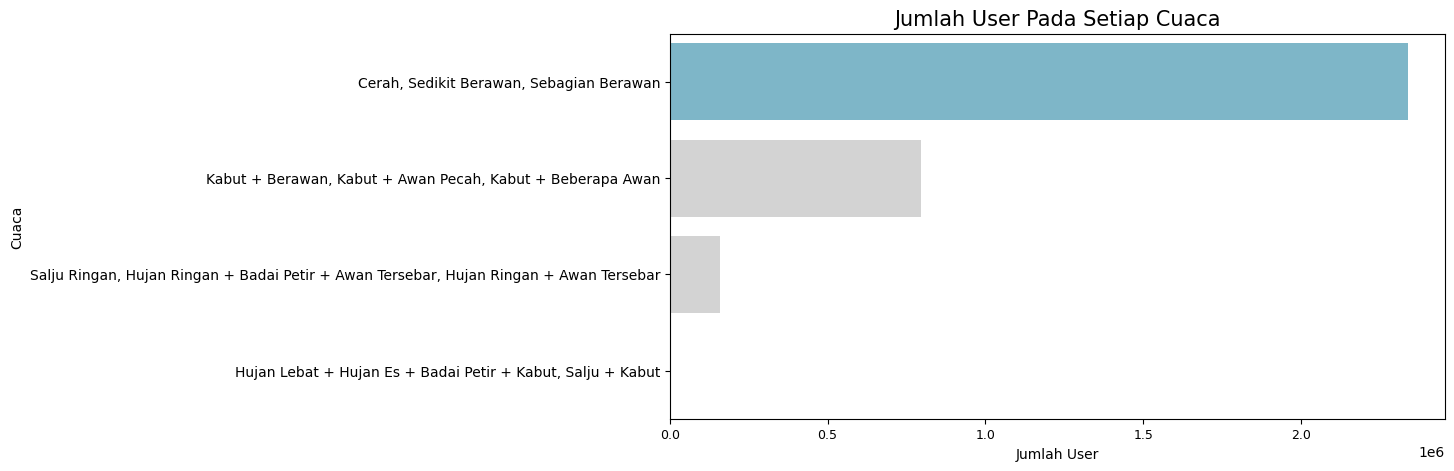

In [ ]:
banyak_user_weather = hour_df.groupby(by=["weather_cut"]).cnt.sum().sort_values(ascending=True).reset_index()
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

plt.figure(figsize=(10, 5))
sns.barplot(
    y="weather_cut",
    x="cnt",
    data=banyak_user_weather,
    palette=colors
)

plt.title("Jumlah User Pada Setiap Cuaca", loc="center", fontsize=15)
plt.ylabel("Cuaca")
plt.xlabel("Jumlah User")
plt.tick_params(axis='x', labelsize=9)
plt.show()

**Comments**
<br> Membuat tampilan dengan bar plot fitur dari seaborn dan plt. Ambil data cnt dan weather_cut untuk menampilkan data user terbanyak dari setiap weathersit. Weather yang paling banyak meraih user cnt adalah weather 1 (Cerah, Sedikit Berawan, Sebagian Berawan)

### Pertanyaan 2:
Di setiap weather jam berapa yang paling banyak meraih pengguna?

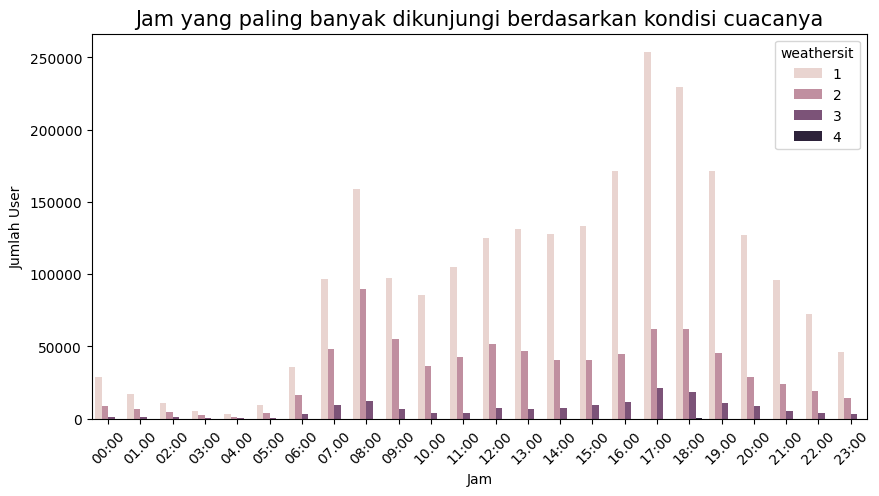

,hr_cut,weathersit,cnt
68,17:00,1,253718
33,08:00,2,89604
70,17:00,3,20975
75,18:00,4,164


In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x="hr_cut",
    y="cnt",
    hue="weathersit",
    data=jumlah_cnt,
)
plt.title("Jam yang paling banyak dikunjungi berdasarkan kondisi cuacanya", loc="center", fontsize=15)
plt.ylabel("Jumlah User")
plt.xlabel("Jam")
plt.tick_params(axis='x', labelsize=10 )
plt.xticks(rotation=45)
plt.show()

max_cnt = jumlah_cnt.loc[jumlah_cnt.groupby("weathersit")['cnt'].idxmax()]
max_cnt.head()



**Comments**
<br> Membuat kolom baru hour_cut dengan cut pandas untuk mendeskripsikan value jam lebih detail. Kemudian membuat tabel pivot banyak user berdasarkan weather dan hour_cut. Lalu membuat tampilan dengan scatterplot dari seaborn. Muncul hasil yang terlihat dari chart titik data user paling banyak berdasarkan jam dan weather.





###**Kesimpulan**
- **Pertanyaan 1:** Kapan cuaca yang paling banyak meraih pengguna casual dan registered?
<br> **Jawaban:** Cuaca yang paling banyak meraih user cnt adalah **weather 1** cuaca cerah dan berawan dan yang paling sedikit adalah cuaca hujan lebat, salju lebat, dll

- **Pertanyaan 2:** Di setiap weather, jam berapa yang paling banyak meraih pengguna?
<br> **Jawaban:**
<br> **Weather 1 = Pukul 17:00 (5 sore)** - 253718 user
<br> **Weather 2 = Pukul 08:00 (8 pagi)** - 8904 user
<br> **Weather 3 = Pukul 17.00 (5 sore)** - 20975 user
<br> **Weather 4 = Pukul 18:00 (6 sore)** - 164 user


##
1. Weather 1: Cerah, Sedikit Berawan, Sebagian Berawan
2. Weather 2: Kabut + Berawan, Kabut + Awan Pecah, Kabut + Beberapa Awan
3. Weather 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan Tersebar, Hujan Ringan + Awan Tersebar
4. Weather 4: Hujan Lebat + Hujan Es + Badai Petir + Kabut, Salju + Kabut
